In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import itertools

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')
df_x_y = df.iloc[:,4:19]
tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])

[sad, classical, country, party, happy, ..., oldhits, rock, trance, workout, edm]
Length: 14
Categories (14, object): [sad, classical, country, party, ..., rock, trance, workout, edm]
['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.tight_layout()


# Random Forest

In [28]:
def random_forrest_model(x_train, y_train, x_val, y_val):
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
    clf.fit(x_train, y_train)
    print("Feature importance: ")
    print(clf.feature_importances_)
    y_pred = clf.predict(x_val)
    print("final valdation accuracy: ", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    return accuracy_score(y_val, y_pred), y_pred

Feature importance: 
[0.06243222 0.11665078 0.13164449 0.02173264 0.05467958 0.08823082
 0.1564542  0.00034816 0.08668973 0.01077739 0.10250009 0.08065918
 0.06703681 0.02016392]
final valdation accuracy:  0.4846325167037862
             precision    recall  f1-score   support

          0       0.68      0.49      0.57       298
          1       0.44      0.65      0.52       324
          2       0.46      0.77      0.57       341
          3       0.27      0.02      0.03       188
          4       0.46      0.80      0.59       376
          5       0.70      0.86      0.77       401
          6       0.29      0.04      0.08       204
          7       0.31      0.34      0.32       287
          8       0.24      0.11      0.15       357
          9       0.30      0.12      0.17       232
         10       0.40      0.55      0.46       570
         11       0.37      0.28      0.32       437
         12       0.91      0.97      0.94       306
         13       0.25      0.01

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Normalized confusion matrix
[[0.54666667 0.07       0.02333333 0.         0.01       0.09333333
  0.         0.00333333 0.02       0.02       0.19333333 0.01666667
  0.         0.00333333]
 [0.00664452 0.55481728 0.02325581 0.         0.01993355 0.00664452
  0.         0.04983389 0.02990033 0.00332226 0.26578073 0.03986711
  0.         0.        ]
 [0.00294118 0.02647059 0.69705882 0.         0.04117647 0.05294118
  0.01176471 0.06176471 0.01470588 0.         0.03235294 0.04117647
  0.01764706 0.        ]
 [0.03314917 0.22651934 0.17679558 0.         0.12707182 0.02762431
  0.01104972 0.08287293 0.12154696 0.01104972 0.13812155 0.0441989
  0.         0.        ]
 [0.00287356 0.01149425 0.01724138 0.         0.83045977 0.01149425
  0.00574713 0.02873563 0.00862069 0.         0.02873563 0.0545977
  0.         0.        ]
 [0.04314721 0.00507614 0.00761421 0.         0.00507614 0.84771574
  0.         0.         0.         0.         0.07360406 0.0177665
  0.         0.        ]
 [0.00510

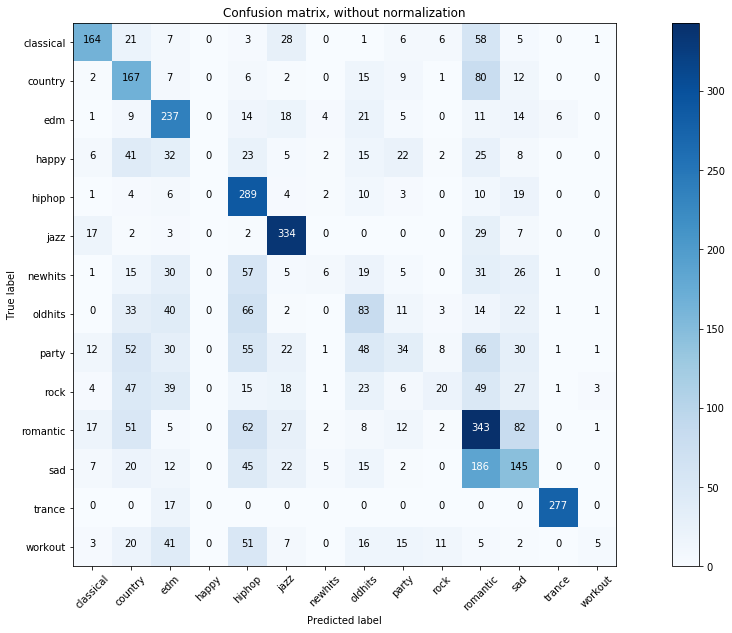

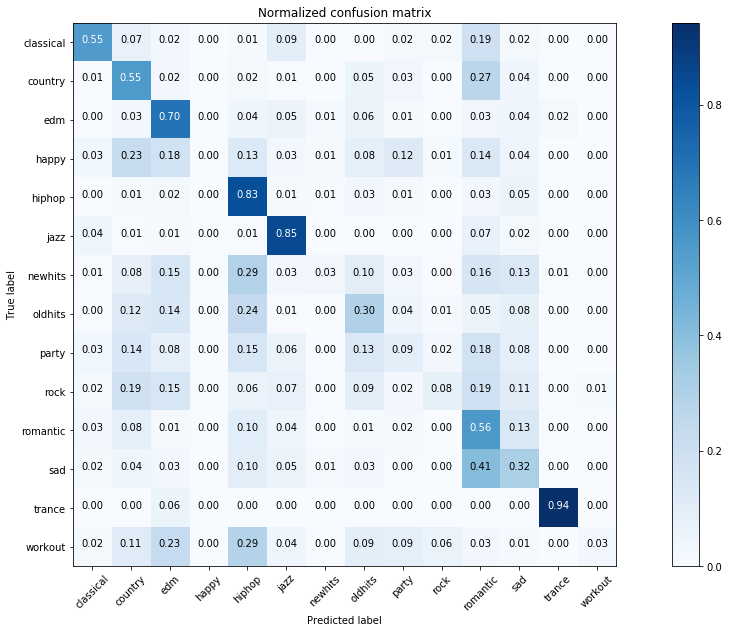

Total Accuracy:  0.4652561247216036


In [29]:
# In[ ]:

from sklearn.model_selection import KFold
accuracy=[]

for n in range(1):
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_train = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    # model here
    # accuracy.append(accuracy_m1)
    values = random_forrest_model(X_train, y_train, X_test, y_train)
    accuracy_value = values[0]
    y_pred = values[1]
    accuracy.append(accuracy_value)
    
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    # accuracy.append(accuracy_m2)
    values = random_forrest_model(X_train, y_train, X_test, y_train)
    accuracy_value = values[0]
    y_pred = values[1]
    accuracy.append(accuracy_value)
    if(n == 0):
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, y_pred)
        normal_cm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("overlapping_matrix")
        overlapping_matrix = [] 
        for i in range(len(normal_cm)):
            row = []
            for j in range(len(normal_cm[i])):
                if(i == j):
                    row.append(1)
                else:
                    val = (normal_cm[i][j] + normal_cm[j][i])/2
                    row.append(val)
            overlapping_matrix.append(row)
        print(overlapping_matrix)
        print("similarity_matrix")
        similarity_matrix = []
        for i in range(len(overlapping_matrix)):
            row = []
            for j in range(len(overlapping_matrix[i])):
                row.append(1- overlapping_matrix[i][j])
            similarity_matrix.append(row)
        print(similarity_matrix)
        # Plot non-normalized confusion matrix
        plt.figure(figsize=(20,10))
        print(class_names)
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                              title='Confusion matrix, without normalization')

        # Plot normalized confusion matrix
        plt.figure(figsize=(20,10))
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                              title='Normalized confusion matrix')

        plt.show()
# calculate average accuracy
print("Total Accuracy: ", sum(accuracy)/len(accuracy))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(similarity_matrix)
print(clustering) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


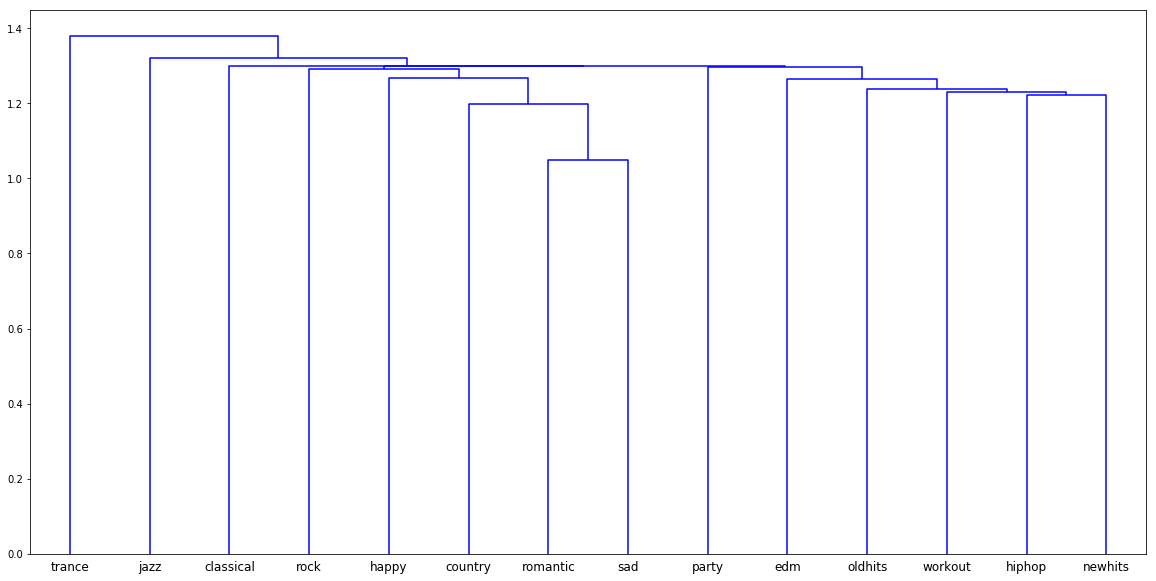

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
X = similarity_matrix
linked = linkage(X, 'single')

labelList = ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']

plt.figure(figsize=(20, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


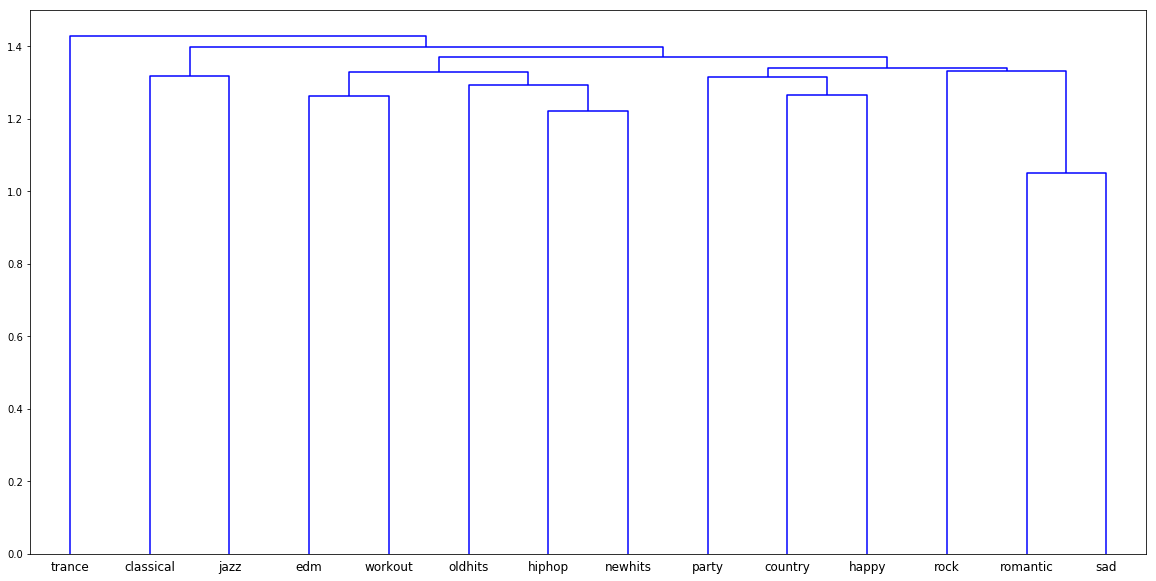

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
X = similarity_matrix
linked = linkage(X, 'average')

labelList = ['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']

plt.figure(figsize=(20, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

# classifier for trance and C1

dataset

In [41]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')
df_x_y = df.iloc[:,4:19]
tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])

new_labels = []
for i in y:
    if i == 12:
        new_labels.append(1)
    else:
        new_labels.append(0)
y = np.asarray(new_labels)

print(y)

[sad, classical, country, party, happy, ..., oldhits, rock, trance, workout, edm]
Length: 14
Categories (14, object): [sad, classical, country, party, ..., rock, trance, workout, edm]
['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'trance', 'workout']
[0 0 0 ... 0 0 0]


In [44]:
from sklearn import svm
def SVM_model(x_train, y_train, x_val, y_val):
    clf = svm.SVC(C=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print(classification_report(y_val, y_pred))
    return accuracy_score(y_val, y_pred)

In [46]:
# In[ ]:

from sklearn.model_selection import KFold
accuracy=[]

for n in range(5):
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_train = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    accuracy.append(SVM_model(X_train, y_train, X_test, y_train))
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    accuracy.append(SVM_model(X_train, y_train, X_test, y_train))
# calculate average accuracy
print("Total Accuracy: ", sum(accuracy)/len(accuracy))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      4185
          1       0.97      0.92      0.95       305

avg / total       0.99      0.99      0.99      4490

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4185
          1       0.87      0.86      0.87       305

avg / total       0.98      0.98      0.98      4490

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4199
          1       0.97      0.94      0.95       291

avg / total       0.99      0.99      0.99      4490

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4199
          1       0.86      0.92      0.89       291

avg / total       0.99      0.99      0.99      4490

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4187
          1       0.95      0.96 

# C2

1. Remove all trance songs
2. Give all Jazz and classical songs a label = 1
3. Give all other songs label = 0

In [49]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')
df_x_y = df.iloc[:,4:19]
df = df[df.playlist != 'trance']
tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
new_labels = []
#jazz and classical get label = 1
for i in y:
    if i == 0 or i == 5:
        new_labels.append(1)
    else:
        new_labels.append(0)
y = np.asarray(new_labels)
print(y)

[sad, classical, country, party, happy, ..., newhits, oldhits, rock, workout, edm]
Length: 13
Categories (13, object): [sad, classical, country, party, ..., oldhits, rock, workout, edm]
['classical', 'country', 'edm', 'happy', 'hiphop', 'jazz', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
[0 0 0 ... 0 0 0]


In [50]:
from sklearn import svm
def SVM_model(x_train, y_train, x_val, y_val):
    clf = svm.SVC(C=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print(classification_report(y_val, y_pred))
    return accuracy_score(y_val, y_pred)

In [51]:
from sklearn.model_selection import KFold
accuracy=[]

for n in range(5):
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_train = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    accuracy.append(SVM_model(X_train, y_train, X_test, y_train))
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    accuracy.append(SVM_model(X_train, y_train, X_test, y_train))
# calculate average accuracy
print("Total Accuracy: ", sum(accuracy)/len(accuracy))

             precision    recall  f1-score   support

          0       0.92      0.99      0.96      3510
          1       0.93      0.57      0.70       680

avg / total       0.92      0.92      0.91      4190

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      3510
          1       0.83      0.63      0.72       680

avg / total       0.91      0.92      0.91      4190

             precision    recall  f1-score   support

          0       0.92      0.99      0.95      3490
          1       0.91      0.58      0.71       700

avg / total       0.92      0.92      0.91      4190

             precision    recall  f1-score   support

          0       0.91      0.97      0.94      3490
          1       0.81      0.54      0.65       700

avg / total       0.90      0.90      0.89      4190

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      3515
          1       0.94      0.60 

In [53]:
def random_forrest_C2(x_train, y_train, x_val, y_val):
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
    clf.fit(x_train, y_train)
    #print("Feature importance: ")
    #print(clf.feature_importances_)
    y_pred = clf.predict(x_val)
    #print("final valdation accuracy: ", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    return accuracy_score(y_val, y_pred)

In [54]:
from sklearn.model_selection import KFold
accuracy=[]

for n in range(5):
    kf = KFold(n_splits=2,shuffle=True)
    kf.get_n_splits(X)
    
    for train_index,test_index in kf.split(X):
        X_1,X_2=X[train_index],X[test_index]
        y_1,y_2=y[train_index],y[test_index]
        
    X_train = X_1
    X_test = X_2
    y_train = y_1
    y_train = y_2
    
    # model here
    # accuracy.append(accuracy_m1)
    accuracy.append(random_forrest_C2(X_train, y_train, X_test, y_train))
    X_train = X_2
    X_test = X_1
    y_train = y_2
    y_test = y_1
    
    # model here
    # accuracy.append(accuracy_m2)
    accuracy.append(random_forrest_C2(X_train, y_train, X_test, y_train))
# calculate average accuracy
print("Total Accuracy: ", sum(accuracy)/len(accuracy))

             precision    recall  f1-score   support

          0       0.92      0.99      0.95      3489
          1       0.93      0.54      0.69       701

avg / total       0.92      0.92      0.91      4190

             precision    recall  f1-score   support

          0       0.92      0.96      0.94      3489
          1       0.76      0.57      0.65       701

avg / total       0.89      0.90      0.89      4190

             precision    recall  f1-score   support

          0       0.94      0.99      0.96      3451
          1       0.91      0.69      0.78       739

avg / total       0.93      0.93      0.93      4190

             precision    recall  f1-score   support

          0       0.91      0.98      0.95      3451
          1       0.86      0.57      0.69       739

avg / total       0.90      0.91      0.90      4190

             precision    recall  f1-score   support

          0       0.92      0.99      0.95      3495
          1       0.92      0.57 

# C3 - between Jazz and Classical 

1. Keep only Jazz and classical Dataframes
2. Jazz has label = 0
3. Classical has label = 1

In [181]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['classical', 'jazz']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))
# #jazz and classical get label = 1
# new_labels = []
# for i in y:
#     if i == 0 :
#         new_labels.append(0)
#     else:
#         new_labels.append(1)
# y = np.asarray(new_labels)
# print(y)
print(y)

[classical, jazz]
Categories (2, object): [classical, jazz]
['classical', 'jazz']
1393
1393
[0 0 0 ... 1 1 1]


In [182]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.72401434 0.89605735 0.88530466 0.88129496 0.73741007]
Accuracy: 0.82 (+/- 0.15)


In [186]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.75268817 0.92831541 0.88530466 0.87410072 0.72302158]
Accuracy: 0.83 (+/- 0.16)


# C4

1. EDM, workout, oldhits, hiphop, newhits - class 1 -- 0
2. country, happy, party, rock, romantic, sad - class 2 -- 1

In [202]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['edm', 'workout', 'oldhits', 'hiphop', 'newhits', 'country', 'happy', 'party', 'rock', 'romantic', 'sad']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))
#jazz and classical get label = 1
new_labels = []
for i in y:
    if i == 1 or i==10 or i==5 or i==4 or i==3:
        new_labels.append(0)
    else:
        new_labels.append(1)
y = np.asarray(new_labels)
print(y)
print(y)

[sad, country, party, happy, hiphop, ..., newhits, oldhits, rock, workout, edm]
Length: 11
Categories (11, object): [sad, country, party, happy, ..., oldhits, rock, workout, edm]
['country', 'edm', 'happy', 'hiphop', 'newhits', 'oldhits', 'party', 'rock', 'romantic', 'sad', 'workout']
6987
6987
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


SVM

In [177]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.78469242 0.69885551 0.6416309  0.74946314 0.8030086 ]
Accuracy: 0.74 (+/- 0.12)


Random forrest

In [180]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.76680973 0.69384835 0.6416309  0.74731568 0.7987106 ]
Accuracy: 0.73 (+/- 0.11)


# C5 

1. edm, workout -- class 1 -- 0
2. oldhits, newhits, hiphop -- class 2 -- 1

In [190]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['edm', 'workout', 'oldhits', 'hiphop', 'newhits']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))
#jazz and classical get label = 1
new_labels = []
for i in y:
    if i == 0 or i== 4:
        new_labels.append(0)
    else:
        new_labels.append(1)
y = np.asarray(new_labels)
print(y)
print(y)

[hiphop, newhits, oldhits, workout, edm]
Categories (5, object): [hiphop, newhits, oldhits, workout, edm]
['edm', 'hiphop', 'newhits', 'oldhits', 'workout']
2713
2713
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [191]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.71323529 0.75138122 0.80073801 0.75461255 0.65129151]
Accuracy: 0.73 (+/- 0.10)


In [192]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.72977941 0.80662983 0.85608856 0.78782288 0.70295203]
Accuracy: 0.78 (+/- 0.11)


# C7

1. EDM - class 1 - 0
2. Workout - class 2 - 1

In [194]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['edm', 'workout']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))

print(y)

[workout, edm]
Categories (2, object): [workout, edm]
['edm', 'workout']
1026
1026
[1 1 1 ... 0 0 0]


In [195]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.7961165  0.82439024 0.7804878  0.75609756 0.66341463]
Accuracy: 0.76 (+/- 0.11)


In [196]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.82038835 0.85365854 0.67317073 0.67804878 0.69756098]
Accuracy: 0.74 (+/- 0.15)


# C8

1. oldhits - class 1 - 0
2. Hiphop, newsongs - class 2 - 1

In [198]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['hiphop', 'newhits', 'oldhits']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))
new_labels = []
for i in y:
    if i == 0 or i== 4:
        new_labels.append(0)
    else:
        new_labels.append(1)
y = np.asarray(new_labels)
print(y)


[hiphop, newhits, oldhits]
Categories (3, object): [hiphop, newhits, oldhits]
['hiphop', 'newhits', 'oldhits']
1687
1687
[0 0 0 ... 1 1 1]


In [199]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.74852071 0.69822485 0.78994083 0.87833828 0.81845238]
Accuracy: 0.79 (+/- 0.12)


In [200]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.76627219 0.70710059 0.82840237 0.87537092 0.81845238]
Accuracy: 0.80 (+/- 0.12)


# C6

1. party, country, happy - class 1 -- 0
2. rock, romantic, sad - class 2 -- 1

In [204]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['country', 'happy', 'party', 'rock', 'romantic', 'sad']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))
#jazz and classical get label = 1
new_labels = []
for i in y:
    if i == 2 or i==0 or i==1:
        new_labels.append(0)
    else:
        new_labels.append(1)
y = np.asarray(new_labels)
print(y)
print(y)

[sad, country, party, happy, romantic, rock]
Categories (6, object): [sad, country, party, happy, romantic, rock]
['country', 'happy', 'party', 'rock', 'romantic', 'sad']
4274
4274
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [205]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.71378505 0.67602339 0.58245614 0.77985948 0.76814988]
Accuracy: 0.70 (+/- 0.14)


In [206]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.68691589 0.70526316 0.55204678 0.78805621 0.76932084]
Accuracy: 0.70 (+/- 0.17)


# C10

1. party - class 1 - 0
2. country, happy - class 2 - 1

In [208]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['country', 'happy', 'party']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))
#jazz and classical get label = 1
new_labels = []
for i in y:
    if i == 2:
        new_labels.append(0)
    else:
        new_labels.append(1)
y = np.asarray(new_labels)
print(y)
print(y)

[country, party, happy]
Categories (3, object): [country, party, happy]
['country', 'happy', 'party']
1711
1711
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [209]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.69387755 0.72011662 0.77192982 0.53508772 0.53372434]
Accuracy: 0.65 (+/- 0.20)


In [210]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.71137026 0.73177843 0.80701754 0.52339181 0.55131965]
Accuracy: 0.66 (+/- 0.22)


# C12

1. Country - class 1 -- 0
2. Happy - class 2 -- 1

In [211]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['country', 'happy']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))


print(y)

[country, happy]
Categories (2, object): [country, happy]
['country', 'happy']
994
994
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

In [212]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.72361809 0.73869347 0.76884422 0.7839196  0.75252525]
Accuracy: 0.75 (+/- 0.04)


In [213]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.77889447 0.74371859 0.7638191  0.8241206  0.72222222]
Accuracy: 0.77 (+/- 0.07)


# C11

1. rock -- class 1 -- 0
2. romantic, sad - class 2 -- 1

In [214]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['rock', 'romantic', 'sad']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))
#jazz and classical get label = 1
new_labels = []
for i in y:
    if i == 0:
        new_labels.append(0)
    else:
        new_labels.append(1)
y = np.asarray(new_labels)
print(y)
print(y)

[sad, romantic, rock]
Categories (3, object): [sad, romantic, rock]
['rock', 'romantic', 'sad']
2563
2563
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [215]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.81871345 0.84795322 0.78947368 0.86132812 0.91015625]
Accuracy: 0.85 (+/- 0.08)


In [216]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.83430799 0.84795322 0.79922027 0.8515625  0.93554688]
Accuracy: 0.85 (+/- 0.09)


# C13

In [217]:
datafile='playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')

df = df[df['playlist'].isin(['romantic', 'sad']) ]

tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]

tmp_y['playlist'] = tmp_y['playlist'].astype('category')

print(tmp_y['playlist'].unique())
classes = (tmp_y['playlist'].unique().tolist())
class_names = sorted(classes)
print(class_names)
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])
print(len(X))
print(len(y))

print(y)

[sad, romantic]
Categories (2, object): [sad, romantic]
['romantic', 'sad']
2078
2078
[1 1 1 ... 1 1 1]


In [218]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.558753   0.64423077 0.6939759  0.68433735 0.65542169]
Accuracy: 0.65 (+/- 0.10)


In [219]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.59472422 0.65384615 0.67951807 0.62650602 0.62891566]
Accuracy: 0.64 (+/- 0.06)
